In [26]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import joblib

In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

## Exploratory Data Analysis

In [232]:
train

,auctionId,timeStamp,placementId,websiteId,hashedRefererDeepThree,country,opeartingSystem,browser,browserVersion,device,environmentType,integrationType,articleSafenessCategorization,isSold
0,0024b36a-4fb5-4070-88fb-fc0bfb1909ed,1603974586,69454,42543,df1108bf6ae49dbccf5eab60ff9d04a6a09dda60ec7290...,RO,Android,Facebook App,293_0,Phone,js-fbwv,1,unsafe,False
1,010aa3a7-819c-4cdf-ab98-41de03e98ad7_2a1ae03a-...,1604248341,120706,68203,8f94cf5f1e4c7541162a1b17079e8cc4cdc0b7f69ee886...,US,iOS,Facebook App,NaN,Phone,js-web,2,safe,False
2,011c2268-4091-4ce1-a62a-b96626806808_7ab7385f-...,1604226053,120706,68203,8448d2635d8ce25f3758907451fc740c4b2131693c7a8b...,AU,Android,Facebook App,294_0,Phone,js-web,2,safe,False
3,02075e25-9be2-4c5e-804b-d19d42bb2ddb_3eb4171c-...,1604052768,120706,68203,8448d2635d8ce25f3758907451fc740c4b2131693c7a8b...,US,iOS,Facebook App,NaN,Phone,js-web,2,safe,False
4,02728aa7-09ee-45ee-8f86-395c30066c40_61088bde-...,1604008787,128131,72196,6f220ed56952bc95b4a884da5bed8a875cf4c47c76d402...,DE,Android,Facebook App,294_0,Phone,js-web,2,safe,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96844,fa116c81-d6fd-4b66-b66c-d106be2306d7,1604096639,84183,49599,6c4ca00c1cb7ed5b1a0b1f71ea1ecc491e54320fec8b8e...,AT,iOS,Safari mobile,14_0,Phone,js-web,1,unsafe,False
96845,fae24462-53b0-45a7-980d-deb09d7dacef,1604019127,126601,65199,57d00482dc140d9307ae92b3a70353a3f9a70f502be4b5...,TW,iOS,Safari mobile,NaN,Phone,js-fbwv,1,safe,False
96846,fc4b8108-634c-4d04-a0f4-f612a931b647_10a3d1e8-...,1604067612,102675,58734,374c0575d1fdf683fcf4989ed36cf25b30a3a9981f918c...,BR,iOS,Chrome Mobile,86_0,Phone,js-web,2,uncat,True
96847,fcd1a5fb-9857-4f2a-be25-66594898dc0e_5c9905ba-...,1604079367,104595,59844,76969b784b3d8dc12aa9f9045d9a5c47302f9ad41d2ac2...,UK,iOS,Facebook App,NaN,Phone,js-web,2,uncat,False


In [233]:
test

,auctionId,timeStamp,placementId,websiteId,hashedRefererDeepThree,country,opeartingSystem,browser,browserVersion,device,environmentType,integrationType,articleSafenessCategorization
0,01943aa0-c202-4052-af7c-4478a4fbd651_c5281852-...,1603987450,127285,71799,b4ac53247235c618d78cca83f112cd68bacf562dc575b2...,UK,Android,Chrome Mobile,86_0,Phone,js-web,2,uncat
1,0368c9f2-3f7e-424f-9d41-16e0b45400cd_1b65693d-...,1603726992,132055,46458,b37fb57f0189132d2251099a03f0fd525a1c188b65f5c0...,US,Chrome OS,Chrome,85_0,PC,js-web,2,safe
2,038c7d6e-74e6-46b2-9691-c57ba7388c61_21d8420b-...,1603839406,121842,68951,e01175c1daea2889a6c8801cf8013bdf143f56bb99c2a2...,US,macOS,Safari,14_0,PC,js-web,2,safe
3,0a74e7ff-f4f3-444c-a67e-d36a76abe030,1603708830,103396,53219,14e75ac9db6faf4ea13c260ccb3e0f8229ee058619debc...,MX,Android,Chrome Mobile,36_0,Phone,js-amp,1,unsafe
4,0bed9764-8882-46ae-a93e-d4e3ad73cc30_ba86b50c-...,1603786935,66981,41405,7881f3d716b442b033c331e1fbcc31f99b9c29f248b8dc...,US,Android,Chrome Mobile,80_0,Phone,js-web,2,safe
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24382,fa97dd2a-f12f-4099-a61c-e448cfbcb4bf_9596dc60-...,1604189940,128709,41266,11e44c2d430bea56e1b8a2f33bceef94cde86edf387052...,FR,iOS,Safari mobile,13_1,Phone,js-web,2,uncat
24383,fb23f054-c2cb-43e9-af82-a80061aa90a5_edbc949f-...,1604128952,132192,73833,c7986280ffe3893973bb04af9297370070de7a6e42345d...,IT,macOS,Safari,13_1,PC,js-web,2,safe
24384,fd8ec5f0-5465-4652-b71e-7188133124a7_a274327b-...,1604227356,127971,14728,c0ae18022d9190602f02e17050e0de7aa627ed6ac0f02e...,CH,Android,Chrome,86_0,Tablet,js-web,2,uncat
24385,feba8c1f-b452-4784-b017-d0dd7e6b76e9_24e83b96-...,1603889531,125026,70705,9f568fa46e63b44ce2a507d31672bdfbec8d730a59cd54...,IT,Windows,Microsoft Edge,86_0,PC,js-web,2,safe


In [234]:
print("(number of observations, number of variables):")
print(train.shape)
print("\nvariable names:")
print(train.columns)
print("\ndata types:")
print(train.dtypes)

(number of observations, number of variables):
(96849, 14)

variable names:
Index(['auctionId', 'timeStamp', 'placementId', 'websiteId',
       'hashedRefererDeepThree', 'country', 'opeartingSystem', 'browser',
       'browserVersion', 'device', 'environmentType', 'integrationType',
       'articleSafenessCategorization', 'isSold'],
      dtype='object')

data types:
auctionId                        object
timeStamp                         int64
placementId                       int64
websiteId                         int64
hashedRefererDeepThree           object
country                          object
opeartingSystem                  object
browser                          object
browserVersion                   object
device                           object
environmentType                  object
integrationType                   int64
articleSafenessCategorization    object
isSold                             bool
dtype: object


### Exploring Categorical Data

In [8]:
train.placementId.value_counts(normalize=True)

121842    0.120858
121840    0.025638
121836    0.018926
108383    0.009282
91837     0.006794
            ...   
120694    0.000010
106067    0.000010
99314     0.000010
56761     0.000010
126601    0.000010
Name: placementId, Length: 6327, dtype: float64

In [9]:
train.websiteId.value_counts(normalize=True)

68951    0.174653
48177    0.016954
42779    0.015612
20808    0.009365
57369    0.009282
           ...   
46365    0.000010
71200    0.000010
33388    0.000010
60920    0.000010
65199    0.000010
Name: websiteId, Length: 4376, dtype: float64

In [236]:
train.country.value_counts(normalize=True)

US    0.398411
FR    0.073435
UK    0.056236
IT    0.044924
JP    0.041825
        ...   
GN    0.000010
MW    0.000010
RW    0.000010
ET    0.000010
PM    0.000010
Name: country, Length: 192, dtype: float64

In [237]:
train.opeartingSystem.value_counts(normalize=True)

Android      0.433882
iOS          0.268098
Windows      0.205000
macOS        0.076552
Chrome OS    0.005989
OS X         0.004677
Fire OS      0.003531
Linux        0.002096
unknown      0.000103
BSD          0.000052
Tizen        0.000021
Name: opeartingSystem, dtype: float64

In [238]:
train.browser.value_counts(normalize=True)

Chrome Mobile        0.243492
Chrome               0.170544
Facebook App         0.165071
Safari mobile        0.163306
Safari               0.051926
                       ...   
QQbrowser            0.000010
Vewd Store           0.000010
IceDragon            0.000010
Seznam.cz browser    0.000010
Chrome Headless      0.000010
Name: browser, Length: 72, dtype: float64

In [239]:
train.browserVersion.value_counts(normalize=True)

86_0     0.436851
13_1     0.104543
14_0     0.088531
293_0    0.066240
12_1     0.045212
           ...   
5_9      0.000012
155_0    0.000012
6_5      0.000012
158_1    0.000012
45_08    0.000012
Name: browserVersion, Length: 377, dtype: float64

In [240]:
train.device.value_counts()

Phone     64362
PC        28500
Tablet     3983
IPTV          4
Name: device, dtype: int64

In [241]:
train.environmentType.value_counts()

js-web              88493
js-fbwv              1907
js-amp               1732
sdk-inapp            1484
js-ampsf             1329
js-wv                1000
thirdparty-inapp      667
js-sf                 194
js-fbwv-canvas         13
js-wv-canvas           12
js-web-canvas           8
js-ampsf-canvas         7
thirdparty-web          2
Name: environmentType, dtype: int64

In [242]:
train.integrationType.value_counts()

2    78135
1    18714
Name: integrationType, dtype: int64

In [243]:
train.articleSafenessCategorization.value_counts()

safe      70716
uncat     15123
unsafe    11010
Name: articleSafenessCategorization, dtype: int64

In [244]:
train.groupby("isSold").articleSafenessCategorization.value_counts()

isSold  articleSafenessCategorization
False   safe                             36963
        uncat                             8746
        unsafe                            7914
True    safe                             33753
        uncat                             6377
        unsafe                            3096
Name: articleSafenessCategorization, dtype: int64

### Number of sold vs not sold in test data

<AxesSubplot:>

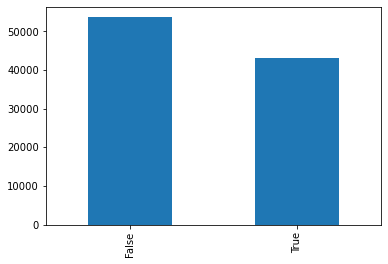

In [246]:
train["isSold"].value_counts().plot.bar()

## Implementing the Model

### Data Pre Processing

In [4]:
train.columns

Index(['auctionId', 'timeStamp', 'placementId', 'websiteId',
       'hashedRefererDeepThree', 'country', 'opeartingSystem', 'browser',
       'browserVersion', 'device', 'environmentType', 'integrationType',
       'articleSafenessCategorization', 'isSold'],
      dtype='object')

In [17]:
# column data preprocessing
nominal_features = ["country", 
                    "placementId", 
                    "websiteId", 
                    "opeartingSystem", 
                    "browser", 
                    "browserVersion", 
                    "device", 
                    "environmentType", 
                    "articleSafenessCategorization"]

cat_pipeline = Pipeline(steps=[("one-hot", OneHotEncoder(handle_unknown='infrequent_if_exist'))])

preprocessor = ColumnTransformer(transformers=[('cat_pipeline', cat_pipeline, nominal_features)], remainder='drop')

In [18]:
max_iter=1000
penalty = "l2"

# final logistic regression pipeline
pipeline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LogisticRegression(random_state=0, max_iter=max_iter, penalty=penalty))
    ]
)

### Training the Model

In [19]:
X = train[nominal_features]
y = train['isSold']
y = y.replace(to_replace=True, value=1)
y = y.replace(to_replace=False, value=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
pipeline.fit(X_train, y_train)
score = pipeline.score(X_test, y_test)
print(f"Model score: {score}")

Model score: 0.7648941662364481


In [21]:
print("confusion matrix")
y_pred_test = pipeline.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred_test)
print(conf_mat)

confusion matrix
[[8537 2143]
 [2411 6279]]


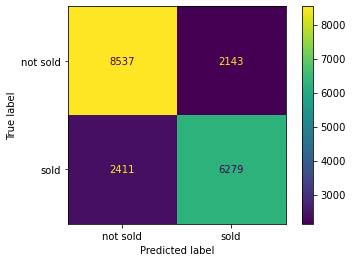

In [31]:
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=["not sold", "sold"])
disp.plot()

### Running Pipeline on new data and saving model

In [22]:
y_pred = pipeline.predict(test)
submission = pd.DataFrame({'auctionId': test.auctionId, 'isSold': y_pred})
submission['isSold'] = submission.isSold.replace({0: 'false', 1: 'true'})

In [23]:
submission.to_csv("data/submission.csv", index=False)

In [24]:
joblib.dump(pipeline, "model.pkl")

['model.pkl']

In [25]:
model = joblib.load('model.pkl')